<a href="https://colab.research.google.com/github/shadab4150/Deep-Learning-Classifiers/blob/master/Comparing_Resnet50_vgg16_Models_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1

* Import necessary libraries

In [0]:
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.applications import VGG16
from keras.utils.vis_utils import plot_model

In [0]:
import warnings
warnings.filterwarnings('ignore')

## Resnet50

In [0]:
num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_validation = 100
batch_size_test = 100

In [0]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [10]:
train_generator = data_generator.flow_from_directory(
    '/content/concrete_data_week4/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 30001 images belonging to 2 classes.


In [11]:
validation_generator = data_generator.flow_from_directory(
    '/content/concrete_data_week4/valid',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical')


Found 9501 images belonging to 2 classes.


In [32]:
test_generator = data_generator.flow_from_directory(
    '/content/concrete_data_week4/test',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_test,
    class_mode='categorical')

Found 500 images belonging to 2 classes.


In [0]:
model = Sequential()

In [0]:
model.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

In [0]:
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.layers[0].trainable = False

## Resnet50 model summary

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


### Ploting reset model

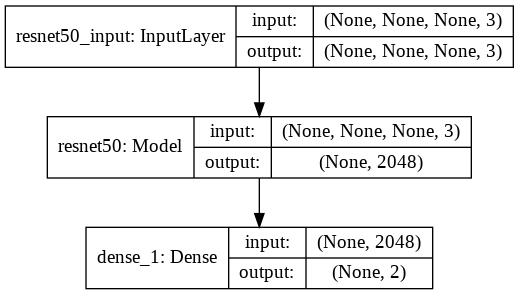

In [142]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 2

In [135]:
fit_history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

Epoch 1/2
301/301 [==============================] - 149s 496ms/step - loss: 0.0073 - acc: 0.9980 - val_loss: 0.1737 - val_acc: 0.9398
Epoch 2/2
301/301 [==============================] - 142s 471ms/step - loss: 0.0080 - acc: 0.9979 - val_loss: 0.1508 - val_acc: 0.9497


##  Resnet50 Training history visualization

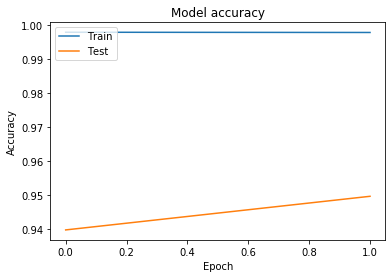

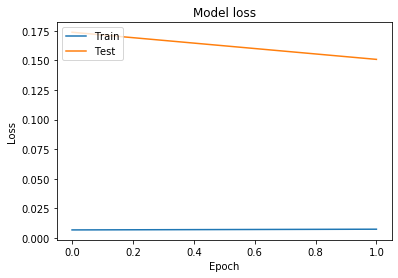

In [143]:
plt.plot(fit_history.history['acc'])
plt.plot(fit_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.save('classifier_resnet_model.h5')

# Model Resnet50 Prediction

In [0]:
filenames = test_generator.filenames
nb_samples = len(filenames)
predictRes = model.predict_generator(test_generator,steps = nb_samples)
predictRes

In [0]:
len(predictRes)

50000

In [31]:
predictRes[501]

array([9.998727e-01, 1.273584e-04], dtype=float32)

## Evaluation

* On validation set

In [45]:
model.evaluate_generator(validation_generator)

[0.14522446574835418, 0.9449531638789159]

* On test set

In [33]:
model.evaluate_generator(test_generator)

[0.13384964726865292, 0.9519999980926513]

In [0]:
import warnings
warnings.filterwarnings('ignore')

# Model VGG16

In [38]:
modelVgg = Sequential()
modelVgg.add(VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

58892288/58889256 [==============================] - 6s 0us/step


In [0]:
modelVgg.add(Dense(num_classes, activation='softmax'))
modelVgg.layers[0].trainable = False

## VGG16 model summary

In [40]:
modelVgg.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


### Ploting model

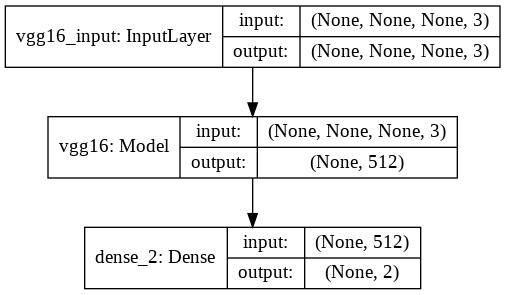

In [141]:
plot_model(modelVgg, show_shapes=True, show_layer_names=True)

In [0]:
modelVgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

* for 2 epochs

In [144]:
fitVgg_history = modelVgg.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

Epoch 1/2
301/301 [==============================] - 194s 646ms/step - loss: 0.0116 - acc: 0.9971 - val_loss: 0.0101 - val_acc: 0.9978
Epoch 2/2
301/301 [==============================] - 197s 655ms/step - loss: 0.0090 - acc: 0.9977 - val_loss: 0.0084 - val_acc: 0.9981


## VGG16 Training history visualization

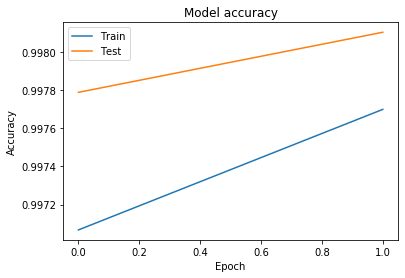

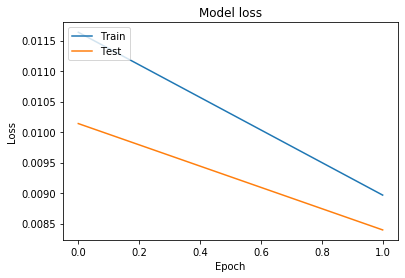

In [145]:
plt.plot(fitVgg_history.history['acc'])
plt.plot(fitVgg_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(fitVgg_history.history['loss'])
plt.plot(fitVgg_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
modelVgg.save('classifier_vgg_model.h5')

## Vgg evaluation

* On validation Set

In [44]:
modelVgg.evaluate_generator(validation_generator)

[0.013634097497595017, 0.9972634479354876]

* On test set

In [46]:
modelVgg.evaluate_generator(test_generator)

[0.011752389371395111, 0.9980000019073486]

<a id="item43"></a>

## Part 2

### Loading model resnet saved from earlier

In [0]:
from keras.models import load_model

In [0]:
modelRes = load_model('classifier_resnet_model.h5')

## Evalution on Resnet50

* On validation set

In [48]:
model.evaluate_generator(validation_generator)

[0.14522446574835418, 0.9449531638789159]

* On test set

In [36]:
modelRes.evaluate_generator(test_generator)

[0.13384964913129807, 0.9519999980926513]

## Evaluation On VGG16

* On validation set

In [49]:
modelVgg.evaluate_generator(validation_generator)

[0.013634097497595017, 0.9972634479354876]

* On test set

In [50]:
modelVgg.evaluate_generator(test_generator)

[0.011752389091998338, 0.9980000019073486]

<a id="item44"></a>

## Part 3

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

In [0]:
path = Path('/content/concrete_data_week4/test/')
test_fn = test_generator.filenames

In [0]:
def show_img(x):
  img = mpimg.imread(path/x)
  plt.imshow(img);
  plt.axis('off')
  plt.show()
  return

## Prediction using resnet50 trained model

In [0]:
predictRes = model.predict_generator(test_generator)

## Prediction using VGG16 trained model

In [0]:
predictVgg = modelVgg.predict_generator(test_generator)

In [0]:
predictRes1 = [np.argmax(x) for x in predictRes]
predictVgg1 = [np.argmax(x) for x in predictVgg]

In [0]:
predRes = []
predVgg = []
for i in predictRes1:
  if i==0:
    predRes.append('negative')
  else:
    predRes.append('positive')
for j in predictVgg1:
  if j==0:
    predVgg.append('negative')
  else:
    predVgg.append('positive')


## Result of first 5 from testset

In [124]:
print('resnet50')
print('--'*35)
print(predRes[:5])
print('--'*35)
print('VGG16')
print('--'*35)
print(predVgg[:5])

resnet50
----------------------------------------------------------------------
['negative', 'positive', 'negative', 'positive', 'positive']
----------------------------------------------------------------------
VGG16
----------------------------------------------------------------------
['negative', 'negative', 'negative', 'positive', 'negative']


### Result of first 5 from test_set

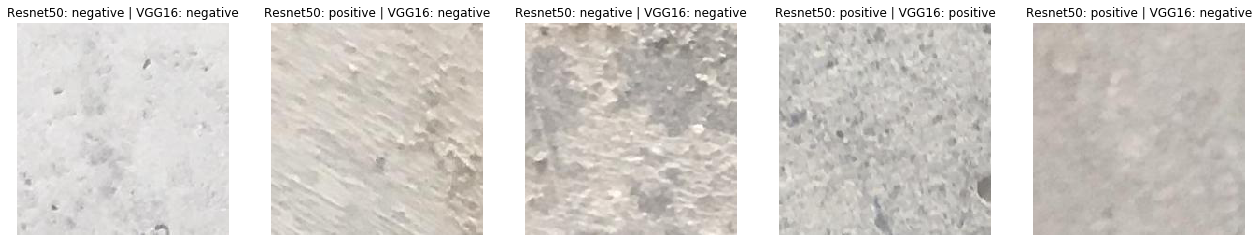

In [131]:
plt.figure(1,figsize=(22,4))
for i in range(5):
  plt.subplot(151+i)
  img = mpimg.imread(path/test_fn[i])
  plt.imshow(img);
  plt.title('Resnet50: '+str(predRes[i])+" | "+'VGG16: '+str(predVgg[i]))
  plt.axis('off')